<a href="https://colab.research.google.com/github/quantum-intelligence/computational-physics/blob/main/CP_Lecture_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Physics
## Lecture 17
### Fourier Transform

In [4]:
!pip install yfinance

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from scipy.fft import fft, ifft, fftshift
%matplotlib inline
import pandas_datareader.data as web
import datetime as dt

In [6]:
import yfinance as yf

### QUESTIONS
Create a synthetid data set comprising a sum of sine functions.
- Do an FFT analysis for 1 sine function
- Do an FFT analysis for 1 sine function + constant
- Consider 5 sine functions (with frequencies 1,2,3,4,5)
- Vary the sampling rate and/or step size to test the Nyquist frequency. What is the role of aliasing in your analysis?

### Consider real world data
- We will use stock market data which can seem periodic at times

In [2]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

In [10]:
try:
  # this code may be outdated
  df = web.DataReader("TSLA", 'yahoo', start, end) #Tesla
  df2 = web.DataReader("SPY", 'yahoo', start, end) #SP500 index
except:
  df = yf.download('TSLA', start=start, end=end)
  df2 = yf.download('SPY', start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [12]:
# assume time steps of one day and no weekends
t =  np.arange(len(df))
price = df['Close']; price = np.asarray(price)

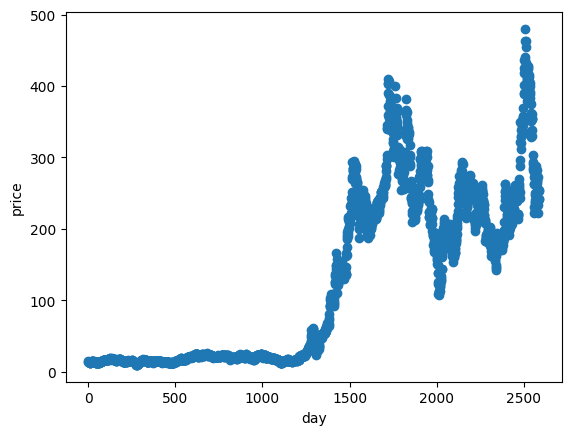

In [13]:
#plot price data over a number of days
plt.scatter(t,price)
plt.xlabel('day')
plt.ylabel('price')
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


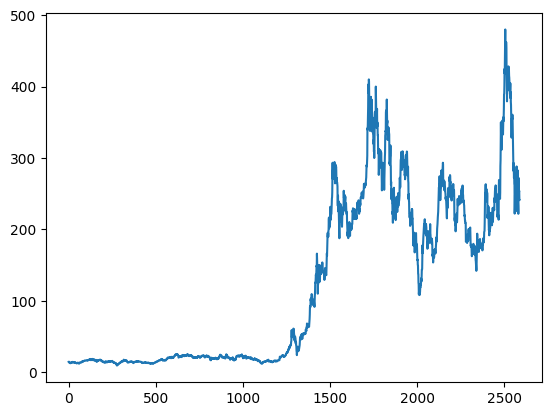

In [19]:
price_fft = fft(price)
freq = np.arange(len(price_fft)) #CHECK RANGE
plt.plot(freq, price_fft)
#plt.ylim(0,100)
#label the axes
plt.show()

In [ ]:
# recalculate the fft usinf scipy.fftshift
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftshift.html
# what does fftshift do? How does it differ from fft?

In [ ]:
### QUESTION:
- vary the window and repeat the analysis
- smooth data and repeat the analysis
- repeat the above for the SP500
- How could you use your analysis to predict the stock price?